<a href="https://colab.research.google.com/github/componavt/topkar-space/blob/main/scr/ner/abbriviation_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****Многозначное****

б - берег, балка (овраг), бухта, болото, брод

г - гора, город, гряда, губа (залив)

д - деревня, дом, дорога, долина

з - заводь, залив, зырянская/зырянский

к - камень (скала), курган, ключ (источник), колодец, коса

м - мыс, мост, могила (курган)

о - озеро, остров, овраг, исток

п - порт, промысел, починок, плес, перевал

пр - протока, пролив, порог

р - река, родник, ручей

с - село, станция, сопка, селище, слобода

у - устье, увал, урочище

гор - гора, город

****Однозначное****

берег, бух, волок, гор (гора), губ (губа), дер (деревня), зал (залив), лес, мыс, оз (озеро), порог, пос (поселок), руч (ручей), уроч (урочище), хут (хутор)

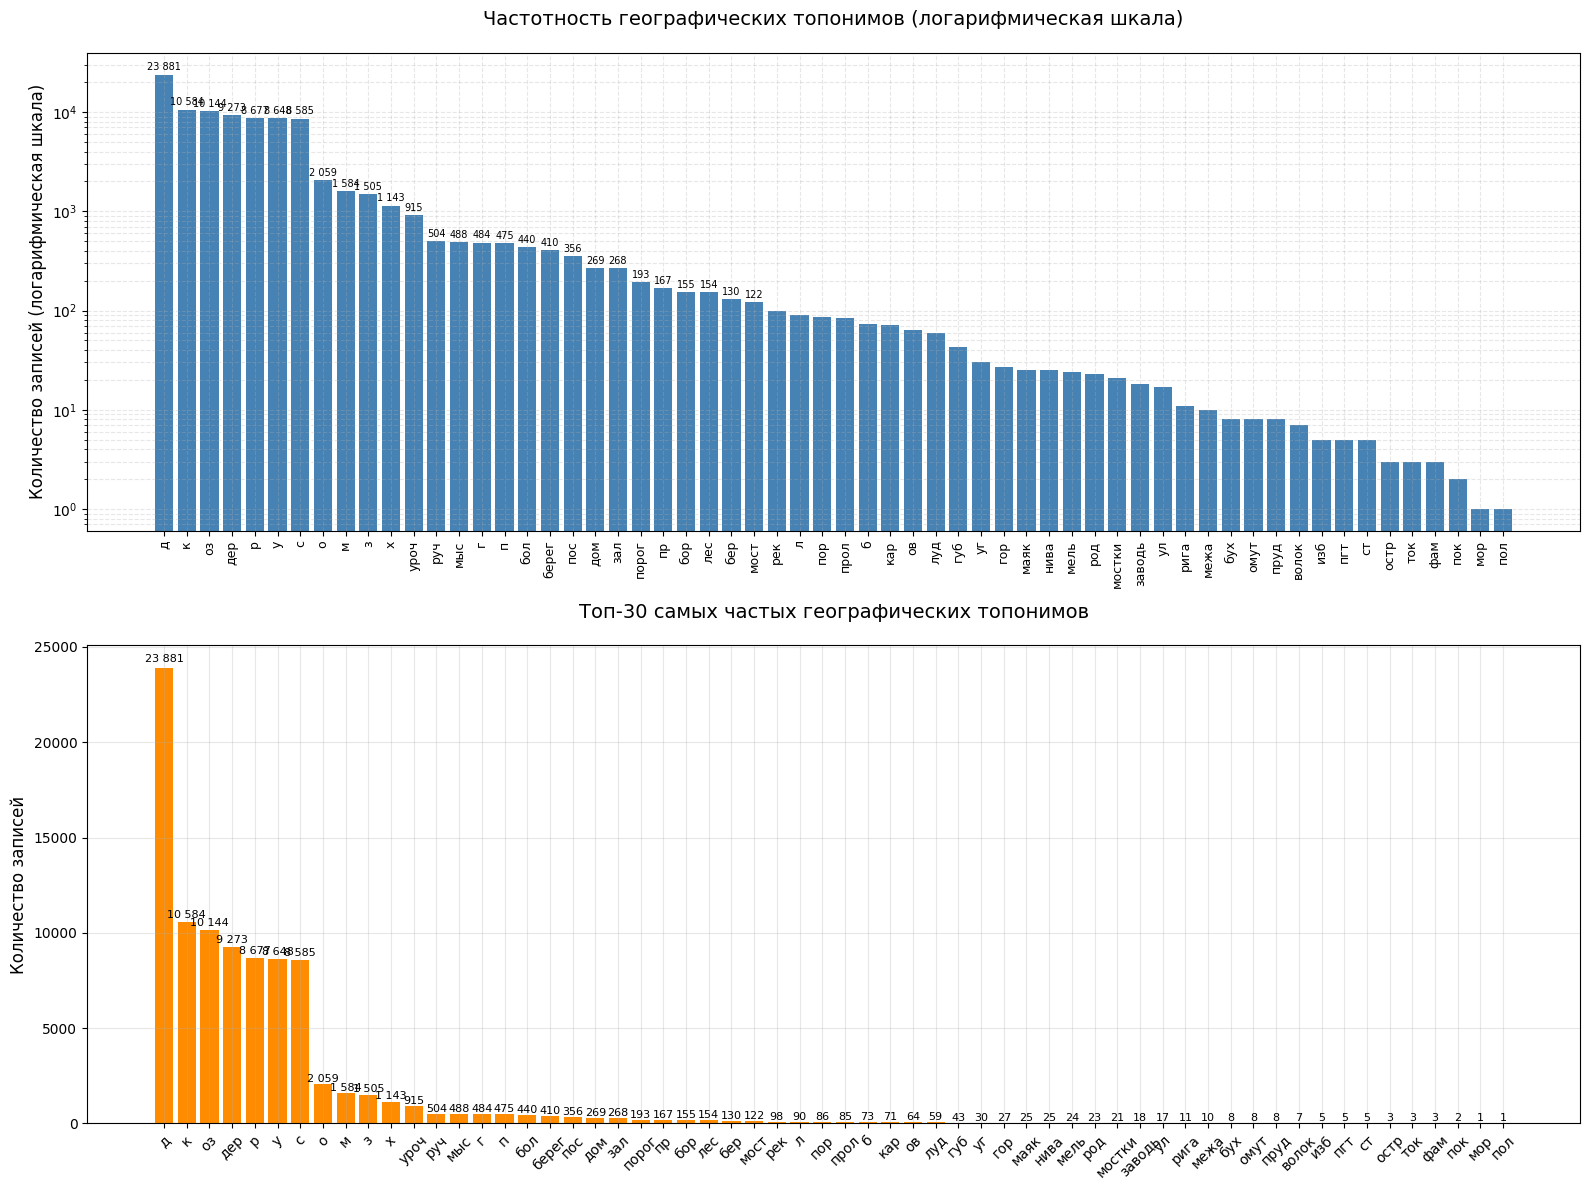

АНАЛИЗ ДАННЫХ ПО КАТЕГОРИЯМ

Супер-частые (>5000 записей): 7 элементов
  д (23881), к (10584), оз (10144), дер (9273), р (8677), у (8648), с (8585)

Очень частые (1000-5000): 4 элементов
  о (2059), м (1584), з (1505), х (1143)

Частые (100-1000): 16 элементов
  уроч (915), руч (504), мыс (488), г (484), п (475), бол (440), берег (410), пос (356), дом (269), зал (268), порог (193), пр (167), бор (155), лес (154), бер (130), мост (122)

Умеренные (10-100): 19 элементов
  рек (98), л (90), пор (86), прол (85), б (73), кар (71), ов (64), луд (59), губ (43), уг (30), гор (27), маяк (25), нива (25), мель (24), род (23), мостки (21), заводь (18), ул (17), рига (11)

Редкие (<10): 14 элементов
  межа (10), бух (8), омут (8), пруд (8), волок (7), изб (5), пгт (5), ст (5), остр (3), ток (3), фам (3), пок (2), мор (1), пол (1)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
data = {
    'б': 73, 'бер': 130, 'берег': 410, 'бол': 440, 'бор': 155, 'бух': 8, 'волок': 7,
    'г': 484, 'гор': 27, 'губ': 43, 'д': 23881, 'дер': 9273, 'дом': 269, 'з': 1505,
    'заводь': 18, 'зал': 268, 'изб': 5, 'к': 10584, 'кар': 71, 'л': 90, 'лес': 154,
    'луд': 59, 'м': 1584, 'маяк': 25, 'межа': 10, 'мель': 24, 'мор': 1, 'мост': 122,
    'мостки': 21, 'мыс': 488, 'нива': 25, 'о': 2059, 'ов': 64, 'оз': 10144, 'омут': 8,
    'остр': 3, 'п': 475, 'пгт': 5, 'пок': 2, 'пол': 1, 'пор': 86, 'порог': 193,
    'пос': 356, 'пр': 167, 'прол': 85, 'пруд': 8, 'р': 8677, 'рек': 98, 'рига': 11,
    'род': 23, 'руч': 504, 'с': 8585, 'ст': 5, 'ток': 3, 'у': 8648, 'уг': 30,
    'ул': 17, 'уроч': 915, 'фам': 3, 'х': 1143
}

# Сортируем данные по убыванию значений
sorted_items = sorted(data.items(), key=lambda x: x[1], reverse=True)
labels = [item[0] for item in sorted_items]
values = [item[1] for item in sorted_items]

# Создаем график
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# График 1: Полный набор данных в логарифмическом масштабе
x_pos = np.arange(len(labels))
bars1 = ax1.bar(x_pos, values, color='steelblue')
ax1.set_yscale('log')
ax1.set_ylabel('Количество записей (логарифмическая шкала)', fontsize=12)
ax1.set_title('Частотность географических топонимов (логарифмическая шкала)', fontsize=14, pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(labels, rotation=90, fontsize=9)
ax1.grid(True, which="both", ls="--", alpha=0.3)

# Добавляем значения на столбцы (только для значимых значений)
for i, (bar, val) in enumerate(zip(bars1, values)):
    if val >= 100:  # Показываем значения только для элементов с частотой >= 100
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height * 1.05,
                f'{val:,}'.replace(',', ' '),
                ha='center', va='bottom', rotation=0, fontsize=7)

# График 2: Только топ-30 самых частых для лучшей читаемости
# top_n = 30
# top_labels = labels[:top_n]
# top_values = values[:top_n]
top_n = 30
top_labels = labels
top_values = values

x_pos_top = np.arange(len(top_labels))
bars2 = ax2.bar(x_pos_top, top_values, color='darkorange')
ax2.set_ylabel('Количество записей', fontsize=12)
ax2.set_title(f'Топ-{top_n} самых частых географических топонимов', fontsize=14, pad=20)
ax2.set_xticks(x_pos_top)
ax2.set_xticklabels(top_labels, rotation=45, fontsize=10)
ax2.grid(True, alpha=0.3)

# Добавляем значения на столбцы
for bar, val in zip(bars2, top_values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height * 1.01,
            f'{val:,}'.replace(',', ' '),
            ha='center', va='bottom', rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

# Также создадим таблицу с категориями для анализа
print("=" * 80)
print("АНАЛИЗ ДАННЫХ ПО КАТЕГОРИЯМ")
print("=" * 80)

# Сгруппируем по диапазонам частот
categories = {
    "Супер-частые (>5000 записей)": [],
    "Очень частые (1000-5000)": [],
    "Частые (100-1000)": [],
    "Умеренные (10-100)": [],
    "Редкие (<10)": []
}

for key, value in sorted_items:
    if value > 5000:
        categories["Супер-частые (>5000 записей)"].append((key, value))
    elif value > 1000:
        categories["Очень частые (1000-5000)"].append((key, value))
    elif value > 100:
        categories["Частые (100-1000)"].append((key, value))
    elif value > 10:
        categories["Умеренные (10-100)"].append((key, value))
    else:
        categories["Редкие (<10)"].append((key, value))

# Выводим категории
for category, items in categories.items():
    print(f"\n{category}: {len(items)} элементов")
    if items:
        items_str = ", ".join([f"{k} ({v})" for k, v in items])
        print(f"  {items_str}")

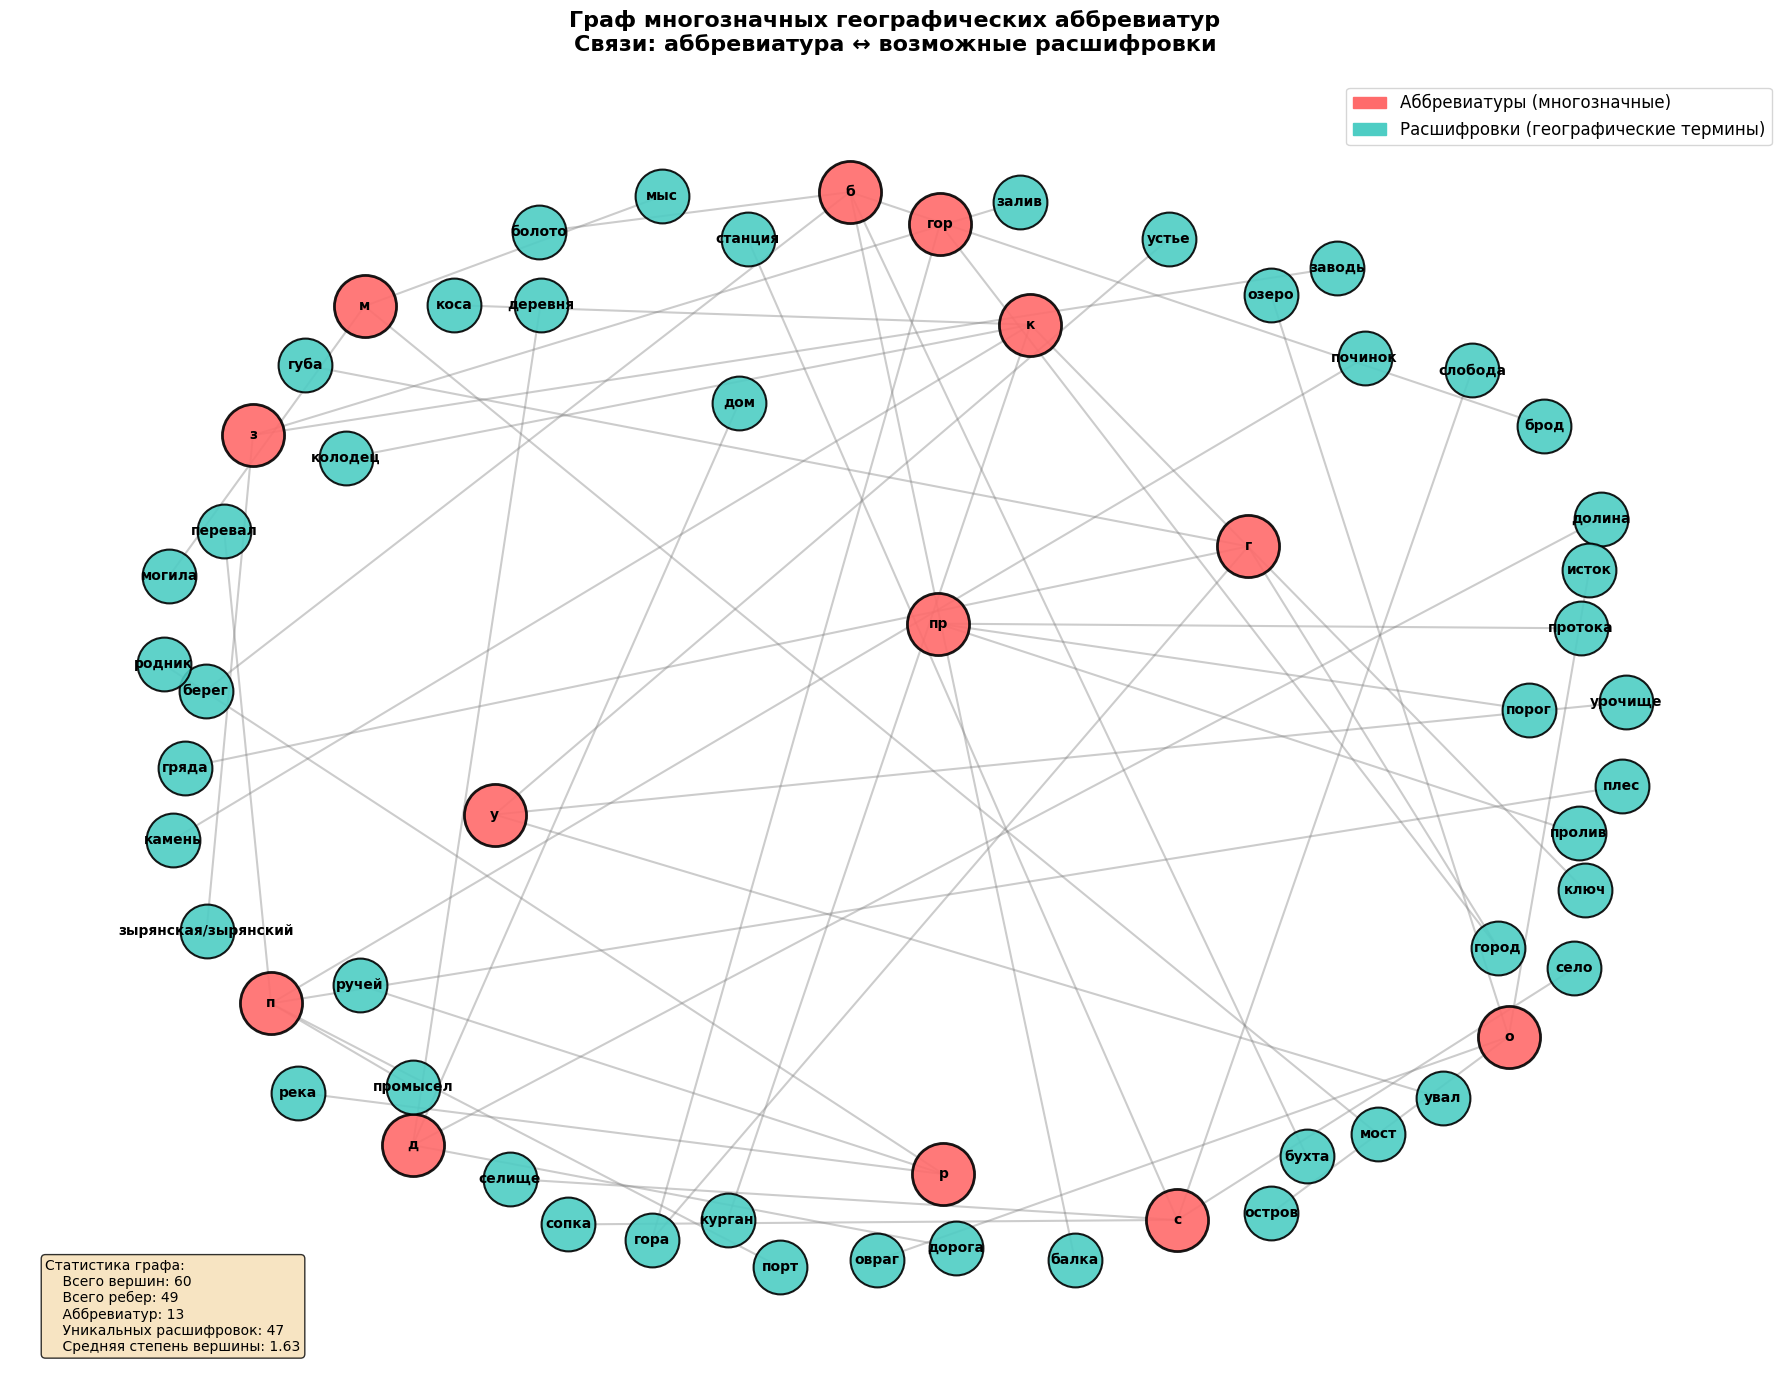

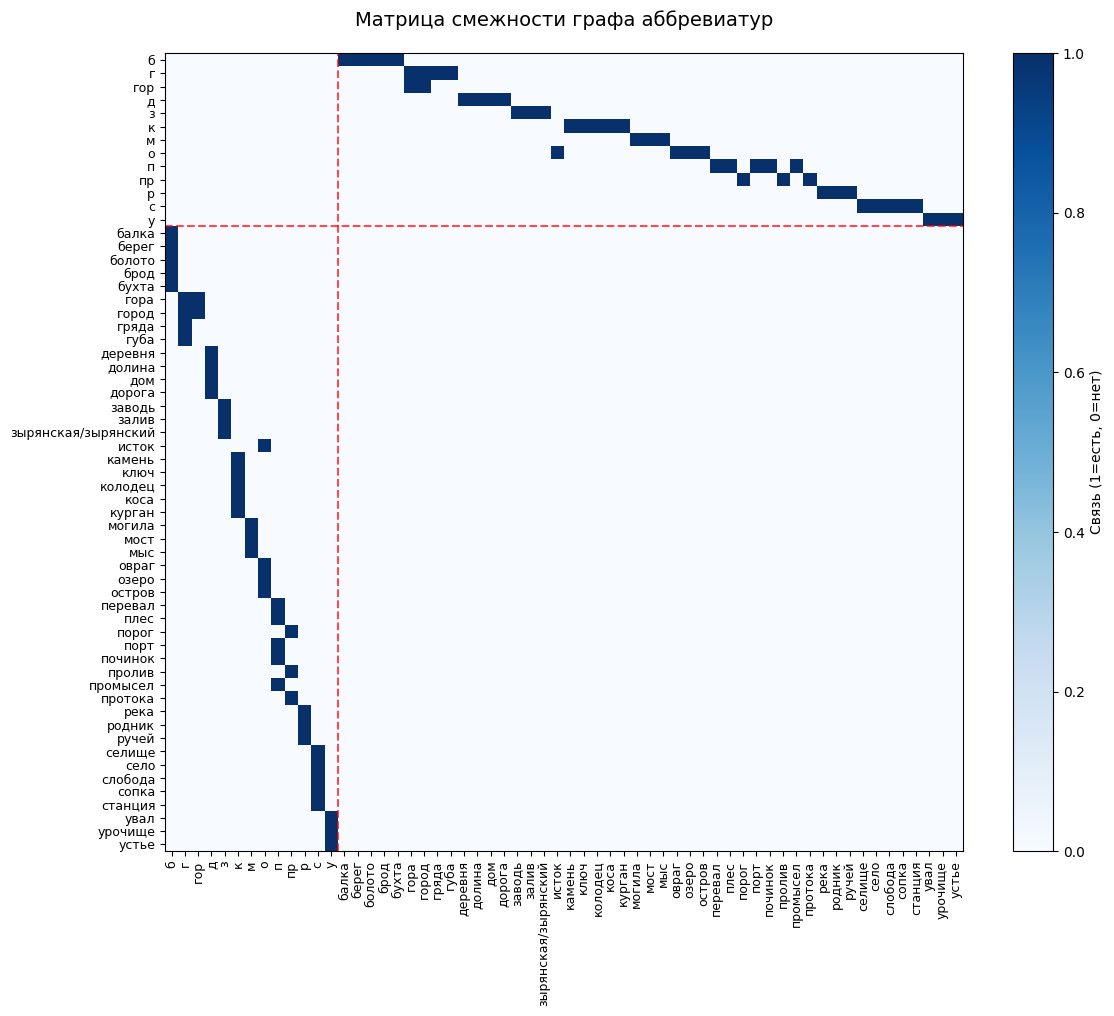

АНАЛИЗ ГРАФА МНОГОЗНАЧНЫХ АББРЕВИАТУР

1. СТАТИСТИКА ПО АББРЕВИАТУРАМ (количество расшифровок):
  б: 5 расшифровок - берег, балка (овраг), бухта, болото, брод
  г: 4 расшифровок - гора, город, гряда, губа (залив)
  гор: 2 расшифровок - гора, город
  д: 4 расшифровок - деревня, дом, дорога, долина
  з: 3 расшифровок - заводь, залив, зырянская/зырянский
  к: 5 расшифровок - камень (скала), курган, ключ (источник), колодец, коса
  м: 3 расшифровок - мыс, мост, могила (курган)
  о: 4 расшифровок - озеро, остров, овраг, исток
  п: 5 расшифровок - порт, промысел, починок, плес, перевал
  пр: 3 расшифровок - протока, пролив, порог
  р: 3 расшифровок - река, родник, ручей
  с: 5 расшифровок - село, станция, сопка, селище, слобода
  у: 3 расшифровок - устье, увал, урочище

2. САМЫЕ ЧАСТЫЕ РАСШИФРОВКИ (связаны с несколькими аббревиатурами):
  'гора': 2 связей - с аббревиатурами: г, гор
  'город': 2 связей - с аббревиатурами: г, гор

3. СВЯЗНЫЕ КОМПОНЕНТЫ ГРАФА:
  Всего связных компонентов: 12
  

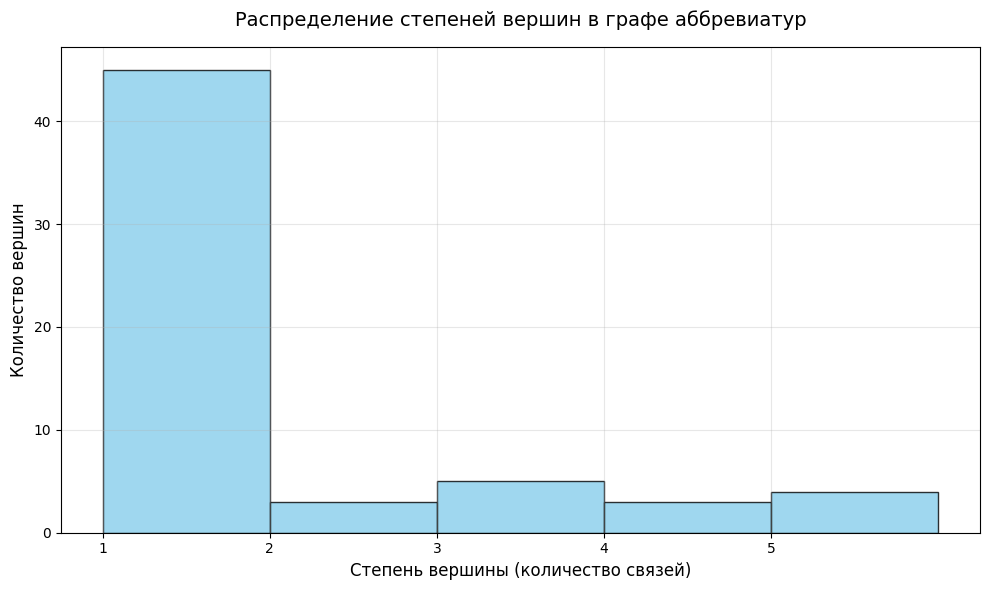

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Данные: аббревиатуры и их расшифровки
abbreviations = {
    'б': ['берег', 'балка (овраг)', 'бухта', 'болото', 'брод'],
    'г': ['гора', 'город', 'гряда', 'губа (залив)'],
    'д': ['деревня', 'дом', 'дорога', 'долина'],
    'з': ['заводь', 'залив', 'зырянская/зырянский'],
    'к': ['камень (скала)', 'курган', 'ключ (источник)', 'колодец', 'коса'],
    'м': ['мыс', 'мост', 'могила (курган)'],
    'о': ['озеро', 'остров', 'овраг', 'исток'],
    'п': ['порт', 'промысел', 'починок', 'плес', 'перевал'],
    'пр': ['протока', 'пролив', 'порог'],
    'р': ['река', 'родник', 'ручей'],
    'с': ['село', 'станция', 'сопка', 'селище', 'слобода'],
    'у': ['устье', 'увал', 'урочище'],
    'гор': ['гора', 'город']  # Добавил как многозначное
}

# Однозначные аббревиатуры (только для информации)
unambiguous = ['берег', 'бух', 'волок', 'гор (гора)', 'губ (губа)', 'дер (деревня)',
               'зал (залив)', 'лес', 'мыс', 'оз (озеро)', 'порог', 'пос (поселок)',
               'руч (ручей)', 'уроч (урочище)', 'хут (хутор)']

# Создаем граф
G = nx.Graph()

# Добавляем вершины и ребра
node_categories = {}  # Для хранения категорий вершин

# Добавляем аббревиатуры как вершины категории "abbr"
for abbr in abbreviations.keys():
    G.add_node(abbr)
    node_categories[abbr] = 'abbr'

# Добавляем расшифровки и соединяем их с аббревиатурами
for abbr, expansions in abbreviations.items():
    for exp in expansions:
        # Очищаем расшифровку от скобок для имени вершины
        exp_clean = exp.split(' (')[0] if ' (' in exp else exp

        # Если такой вершины еще нет, добавляем
        if exp_clean not in G.nodes():
            G.add_node(exp_clean)
            node_categories[exp_clean] = 'expansion'

        # Добавляем ребро между аббревиатурой и расшифровкой
        G.add_edge(abbr, exp_clean, weight=1)

# Функция для визуализации графа с улучшенным дизайном
def visualize_graph(G, node_categories, layout='spring'):
    plt.figure(figsize=(18, 14))

    # Выбираем layout
    if layout == 'spring':
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
    elif layout == 'circular':
        pos = nx.circular_layout(G)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.spring_layout(G, seed=42)

    # Разделяем узлы по категориям
    abbr_nodes = [n for n, cat in node_categories.items() if cat == 'abbr']
    expansion_nodes = [n for n, cat in node_categories.items() if cat == 'expansion']

    # Рисуем ребра
    nx.draw_networkx_edges(G, pos, alpha=0.4, width=1.5, edge_color='gray')

    # Рисуем узлы-аббревиатуры (красные)
    nx.draw_networkx_nodes(G, pos, nodelist=abbr_nodes,
                          node_color='#FF6B6B', node_size=2000,
                          alpha=0.9, edgecolors='black', linewidths=2)

    # Рисуем узлы-расшифровки (синие)
    nx.draw_networkx_nodes(G, pos, nodelist=expansion_nodes,
                          node_color='#4ECDC4', node_size=1500,
                          alpha=0.9, edgecolors='black', linewidths=1.5)

    # Добавляем подписи
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold',
                           font_family='sans-serif')

    # Добавляем легенду
    from matplotlib.patches import Circle
    legend_elements = [
        Circle(0, color='#FF6B6B', label='Аббревиатуры (многозначные)'),
        Circle(0, color='#4ECDC4', label='Расшифровки (географические термины)')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

    # Добавляем заголовок и информацию
    plt.title('Граф многозначных географических аббревиатур\n' +
             'Связи: аббревиатура ↔ возможные расшифровки',
             fontsize=16, fontweight='bold', pad=20)

    # Добавляем статистику в углу
    stats_text = f"""Статистика графа:
    Всего вершин: {G.number_of_nodes()}
    Всего ребер: {G.number_of_edges()}
    Аббревиатур: {len(abbr_nodes)}
    Уникальных расшифровок: {len(expansion_nodes)}
    Средняя степень вершины: {np.mean([d for _, d in G.degree()]):.2f}"""

    plt.text(0.02, 0.02, stats_text, transform=plt.gca().transAxes,
            fontsize=10, verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Визуализируем граф
visualize_graph(G, node_categories, layout='spring')

# Дополнительная визуализация: матрица смежности
plt.figure(figsize=(12, 10))
adj_matrix = nx.to_numpy_array(G)

# Сортируем узлы: сначала аббревиатуры, потом расшифровки
sorted_nodes = sorted(G.nodes(), key=lambda x: (0 if node_categories[x] == 'abbr' else 1, x))

# Перестраиваем матрицу смежности
sorted_adj_matrix = nx.to_numpy_array(G, nodelist=sorted_nodes)

plt.imshow(sorted_adj_matrix, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Связь (1=есть, 0=нет)')

# Настраиваем оси
plt.xticks(range(len(sorted_nodes)), sorted_nodes, rotation=90, fontsize=9)
plt.yticks(range(len(sorted_nodes)), sorted_nodes, fontsize=9)
plt.title('Матрица смежности графа аббревиатур', fontsize=14, pad=20)

# Добавляем разделительную линию между аббревиатурами и расшифровками
abbr_count = sum(1 for n in sorted_nodes if node_categories[n] == 'abbr')
plt.axvline(x=abbr_count-0.5, color='red', linestyle='--', alpha=0.7)
plt.axhline(y=abbr_count-0.5, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Анализ графа
print("=" * 80)
print("АНАЛИЗ ГРАФА МНОГОЗНАЧНЫХ АББРЕВИАТУР")
print("=" * 80)

# 1. Статистика по аббревиатурам
print("\n1. СТАТИСТИКА ПО АББРЕВИАТУРАМ (количество расшифровок):")
for abbr in sorted(abbreviations.keys()):
    degree = G.degree(abbr)
    expansions = abbreviations[abbr]
    print(f"  {abbr}: {degree} расшифровок - {', '.join(expansions)}")

# 2. Самые "популярные" расшифровки
print("\n2. САМЫЕ ЧАСТЫЕ РАСШИФРОВКИ (связаны с несколькими аббревиатурами):")
expansion_counts = {}
for node, cat in node_categories.items():
    if cat == 'expansion':
        degree = G.degree(node)
        if degree > 1:  # Расшифровка связана более чем с одной аббревиатурой
            # Находим какие аббревиатуры ссылаются на эту расшифровку
            connected_abbrs = [n for n in G.neighbors(node) if node_categories.get(n) == 'abbr']
            expansion_counts[node] = (degree, connected_abbrs)

if expansion_counts:
    for exp, (count, abbrs) in sorted(expansion_counts.items(), key=lambda x: x[1][0], reverse=True):
        print(f"  '{exp}': {count} связей - с аббревиатурами: {', '.join(abbrs)}")
else:
    print("  Нет расшифровок, связанных с несколькими аббревиатурами")

# 3. Поиск кластеров (связных компонент)
print("\n3. СВЯЗНЫЕ КОМПОНЕНТЫ ГРАФА:")
components = list(nx.connected_components(G))
print(f"  Всего связных компонентов: {len(components)}")
for i, comp in enumerate(components, 1):
    abbrs_in_comp = [n for n in comp if node_categories.get(n) == 'abbr']
    expansions_in_comp = [n for n in comp if node_categories.get(n) == 'expansion']
    print(f"  Компонент {i}: {len(comp)} вершин "
          f"({len(abbrs_in_comp)} аббревиатур, {len(expansions_in_comp)} расшифровок)")

# 4. График распределения степеней вершин
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=range(1, max(degrees)+2), edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Степень вершины (количество связей)', fontsize=12)
plt.ylabel('Количество вершин', fontsize=12)
plt.title('Распределение степеней вершин в графе аббревиатур', fontsize=14, pad=15)
plt.grid(True, alpha=0.3)
plt.xticks(range(1, max(degrees)+1))

# Добавляем значения на столбцы
for i in range(len(plt.gca().patches)):
    plt.gca().patches[i].set_alpha(0.8)

plt.tight_layout()
plt.show()